In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy import ndimage

import random

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255

y_train = to_categorical(y_train)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [5]:
# building the model

model = Sequential([
    Conv2D(32, (3,3), activation= 'relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation= 'relu'),
    Dense(10, activation= 'softmax')
])

In [6]:
optimizer = SGD(learning_rate= 0.01, momentum= 0.9)

model.compile(
    optimizer= optimizer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2305 - accuracy: 0.9303
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0755 - accuracy: 0.9773
Epoch 3/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0489 - accuracy: 0.9855


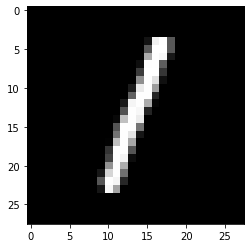

In [7]:
history = model.fit(x_train, y_train, epochs= 3, batch_size= 32)

image = random.choice(x_test)

image = ndimage.rotate(image, 180)
plt.imshow(image, cmap= plt.get_cmap('gray'))
plt.show()



image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255

#digit = np.argmax(model.predict(image)[0], axis= -1)
#print("Prediction:", digit)

In [8]:
history.history

{'loss': [0.2305397242307663, 0.07553790509700775, 0.048924535512924194],
 'accuracy': [0.9303333163261414, 0.9773499965667725, 0.985450029373169]}

In [9]:
print(image.shape)

(1, 28, 28, 1)


In [10]:
digit = np.argmax(model.predict(image)[0], axis= -1)
print("Prediction:", digit)

1/1 [==============================] - 0s 70ms/step
Prediction: 1
